<a href="https://colab.research.google.com/github/Eakiz04/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module F - Eric Kizior

20.1 - Numerical Differentiation Problem Statement
*   **Numerical Grid:** An evenly spaced set of points over the domain of a function (independent variable), over some interval
*   **Step Size:** The distance between adjacent points on the grid (Represented by *h*)

Example 1: Generate a numerical Grid with h = 0.2

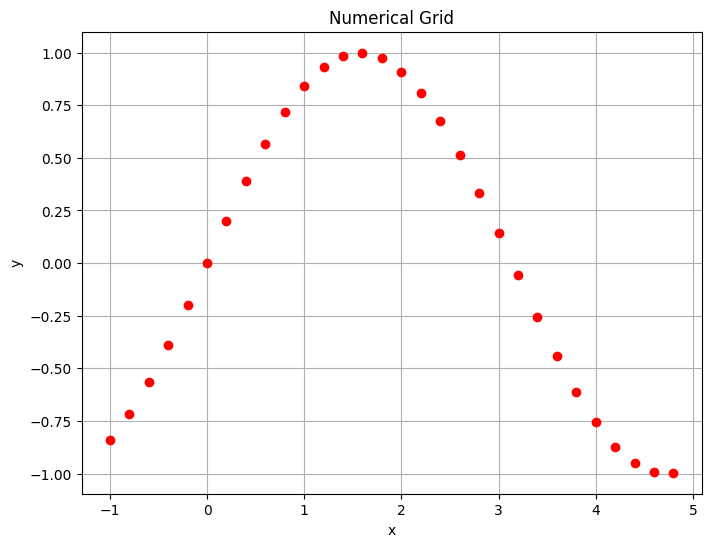

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Step Size
h = .2

# Define grid and function
x = np.arange(-1, 5, h)
y = np.sin(x)

# Plot
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Numerical Grid")
plt.grid()
plt.show()

20.2 - Finite Difference Approximating Derivatives
*   $f'(x)$ at point $x=a$: $f'(a) = \lim_{x → a} \frac{f(x) - f(a)}{x-a}$
*   **Forward Difference:** Estimates the slope of the function at $x_j$ using line that connects $(x_j,f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$ $⇒$ $f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j}$
*   **Backward Difference:** Estimates the slope of the function at $x_j$ using line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j,f(x_j))$ $⇒$ $f'(x_j) = \frac{f(x_{j}) - f(x_{j-1})}{x_{j}-x_{j-1}}$
*   **Central Difference:** Estimates the slope of the function at $x_j$ using line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$ $⇒$ $f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1}-x_{j-1}}$
*   **Using Taylor Series:** For an arbitrary function $f(x)$ the Taylor series of $f$ around $a=x_j$ is $f(x)= \frac{f(x_j)-(x-x_j)^0}{0!} + \frac{f(x_j)-(x-x_j)^1}{1!} + \frac{f(x_j)-(x-x_j)^2}{2!} + ...$
*   If $x$ is on a grid of points with spacing $h$, we can compute the Taylor series at $x=x_{j+1}$ to get $f(x_{j+1})= \frac{f(x_j)-(x_{j+1}-x_j)^0}{0!} + \frac{f(x_j)-(x_{j+1}-x_j)^1}{1!} + \frac{f(x_j)-(x_{j+1}-x_j)^2}{2!} + ...$
*   Substituting $h=x_{j+1}-x_j$ and solving for $f'(x_j)$ gives: $f'(x_j) = \frac{f(x_{j+1})-f(x_j)}{h} + (- \frac{f''(x_j)h}{2!}- \frac{f'''(x_j)h^2}{3!} - ...)$ where $(- \frac{f''(x_j)h}{2!}- \frac{f'''(x_j)h^2}{3!} - ...)$ represents the **higher order terms** of $h$ which is rewritten as $h(α+ ϵ(h))$ or $O(h)$

Example 2: Forward, Backwards, and Central Finite difference approximation of $e^x$

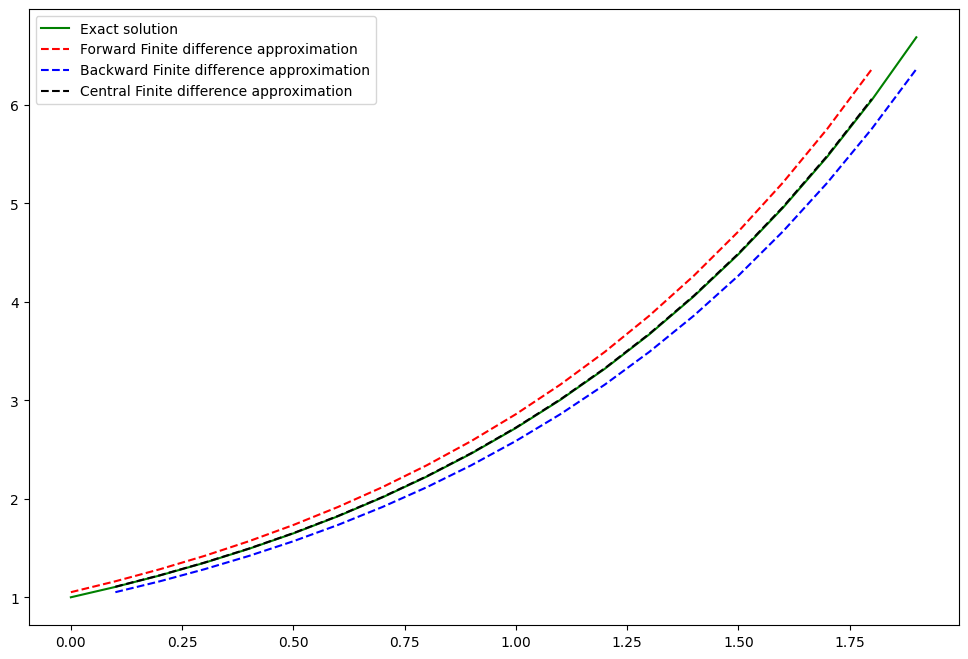

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# step size
h = 0.1
# define grid and function
x = np.arange(0, 2, h)
y = np.exp(x)

# compute vector of forward differences, Backward difference, Central difference
forward = np.diff(y) / h
backward = (y[1:] - y[:-1]) / h
central = (y[2:] - y[:-2]) / (2*h)
# compute corresponding grids
x_gridf = x[:-1:]
x_gridb = x[1:]
x_gridc = x[1:-1:]
# compute exact solution
exact = np.exp(x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, exact,'g-',  \
         label = 'Exact solution')
plt.plot(x_gridf, forward, 'r--', \
         label = 'Forward Finite difference approximation')
plt.plot(x_gridb, backward, 'b--', \
         label = 'Backward Finite difference approximation')
plt.plot(x_gridc, central, 'k--', \
         label = 'Central Finite difference approximation')
plt.legend()
plt.show()


20.3 - Approximating of Higher Order Derivatives
*   Taking the Taylor series around $a=x_j$ and then computing it at $x=x_{j-1}$ and $x_{j+1}$ gives: $f(x_{j-1}) = f(x_j) - hf'(x_j) + \frac{h^2f''(x_j)}{2} - \frac{h^3f'''(x_j)}{6} + ...$ and $f(x_{j+1}) = f(x_j) - hf'(x_j) + \frac{h^2f''(x_j)}{2} - \frac{h^3f'''(x_j)}{6} + ...$
*   $f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) - h^2f''(x_j) + \frac{h^4f''''(x_j)}{24} + ...$
*   $f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}$ which is $O(h^2)$

20.4 - Numerical Differentiation with Noise
*    Sometimes data can be contaminated with **noise**, meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function
*   $f_{ϵ,ω}(x) = f(x) + \epsilon g(\omega x)$ where $0 < ϵ < 1$ is a very small number representing error and $\omega$ is a large number representing the frequency of the noise and g(x) is the function of the noise.
*   $f'_{ϵ,ω}(x) = f'(x) + \epsilon g'(\omega x)$, For the initial function, the noise is negligible but upon taking the derivative, the noise can be dramatic if $\epsilon \omega$ is significantly large

Example 3: Exponential function corrupted by Sin wave

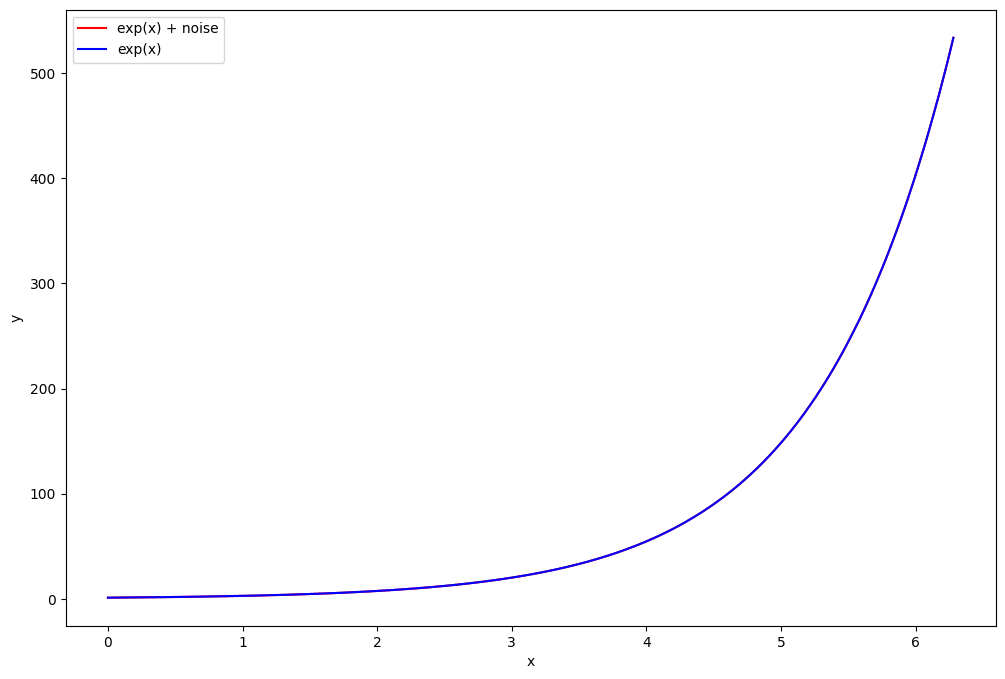

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 200
epsilon = 0.1

y = np.exp(x)
y_noise = y + epsilon*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'exp(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'exp(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

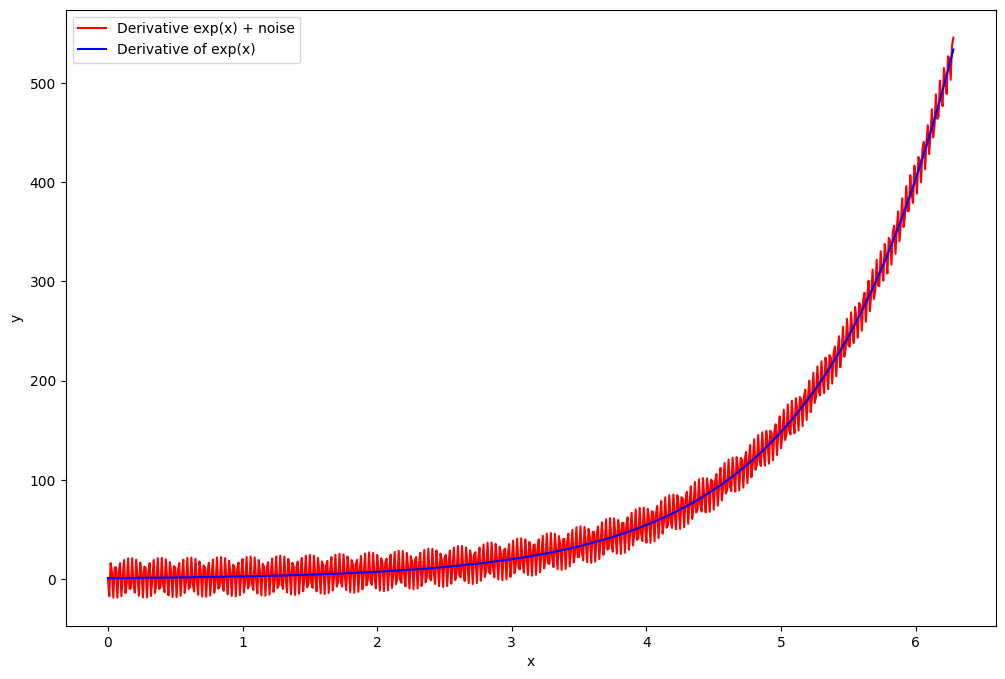

In [43]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = np.exp(x)
y_noise = y - epsilon*omega*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative exp(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of exp(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()
